## MULTI DAPI VAE in PYRO

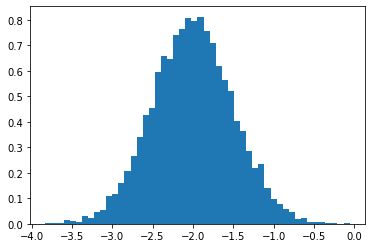

In [13]:
## %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

mu, std = -2.0, 0.5
z = mu + np.random.randn(10000)*std
_ = plt.hist(z, density=True, bins=50) 

9681.0 319.0
0.9681


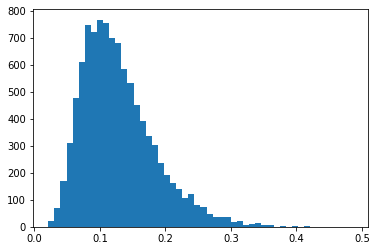

In [14]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

bins=50
half_bins=int(bins*0.5)
x = sigmoid(z)
a = plt.hist(x, density=False, bins=bins) 

lt05 = np.sum(a[0][:half_bins])
gt05 = np.sum(a[0][half_bins:])
print(lt05,gt05)
print(lt05/(lt05+gt05))

In [3]:
print(a[0])
print(a[1])

[2565.  830.  522.  430.  336.  264.  239.  203.  199.  159.  176.  142.
  127.  135.  112.  118.  118.   94.  119.   97.  106.   88.   95.   98.
   92.   83.   61.   84.   78.   85.  108.   82.   85.   87.  100.   75.
   67.   86.   91.   71.   94.  101.   94.   97.   94.  120.  114.  167.
  174.  238.]
[4.09630087e-07 1.99987113e-02 3.99970129e-02 5.99953145e-02
 7.99936161e-02 9.99919177e-02 1.19990219e-01 1.39988521e-01
 1.59986823e-01 1.79985124e-01 1.99983426e-01 2.19981727e-01
 2.39980029e-01 2.59978331e-01 2.79976632e-01 2.99974934e-01
 3.19973236e-01 3.39971537e-01 3.59969839e-01 3.79968140e-01
 3.99966442e-01 4.19964744e-01 4.39963045e-01 4.59961347e-01
 4.79959649e-01 4.99957950e-01 5.19956252e-01 5.39954553e-01
 5.59952855e-01 5.79951157e-01 5.99949458e-01 6.19947760e-01
 6.39946062e-01 6.59944363e-01 6.79942665e-01 6.99940966e-01
 7.19939268e-01 7.39937570e-01 7.59935871e-01 7.79934173e-01
 7.99932475e-01 8.19930776e-01 8.39929078e-01 8.59927379e-01
 8.79925681e-01 8.99923

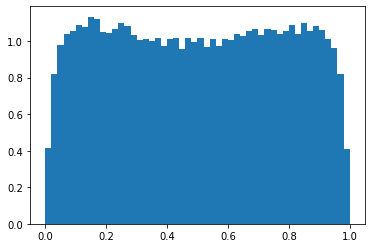

In [4]:
z = np.random.randn(100000)

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def kl(mu, std):
    tmp = (std+1)*(std-1)+(mu-0).pow(2)
    return 0.5*tmp - torch.log(std)

a = np.sqrt(8 / np.pi)

x = sigmoid(a * z)
a = plt.hist(x, density=True, bins=50) 



In [21]:
def kl_bernoulli(p,q):
    return q*np.log(q/p) + (1-q)*np.log((1-q)/(1-p))

qlin = np.linspace(0.01, 0.99, num=50).reshape(1,-1)
plin = np.linspace(0.01, 0.99, num=50).reshape(-1,1)
kl_2d = kl_bernoulli(plin,qlin)

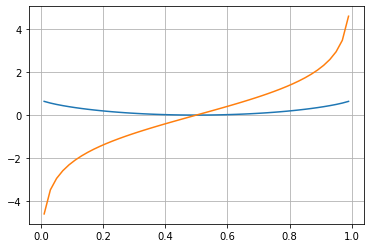

In [42]:
def kl_bernoulli(p,q):
    return q*np.log(q/p) + (1-q)*np.log((1-q)/(1-p))

def der_kl_pq_wrt_q(p,q):
    return np.log(q/p) - np.log((1-q)/(1-p))
    

q = np.linspace(0.01, 0.99, num=50)
#plt.plot(q,kl_bernoulli(0.1,q))
#plt.plot(q,kl_bernoulli(0.3,q))
plt.plot(q,kl_bernoulli(0.5,q))
plt.plot(q,der_kl_pq_wrt_q(0.5,q))
plt.grid()

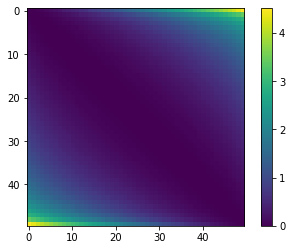

In [23]:
plt.imshow(kl)
plt.colorbar()

In [55]:
def to_unit_interval(value_normal, logp_normal=None):
    value_unit = torch.sigmoid(value_normal)
    if logp_normal is not None:
        logp_unit = logp_normal - F.logsigmoid(value_normal) - F.logsigmoid(- value_normal)
    else:
        logp_unit = None
    return value_unit, logp_unit

def compute_logp_normal(value_normal, mu=None, std=None):
        tmp = (value_normal - mu) / std
        return -0.5 * (tmp * tmp + np.log(2 * np.pi * std * std))

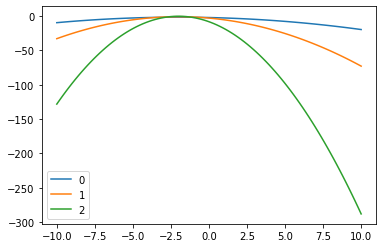

In [57]:
import torch
import torch.nn.functional as F

z = torch.linspace(-10,10,100).float()

logpz0 = compute_logp_normal(z, mu=-2, std=2)
logpz1 = compute_logp_normal(z, mu=-2, std=1)
logpz2 = compute_logp_normal(z, mu=-2, std=0.5)
plt.plot(z,logpz0,label='0')
plt.plot(z,logpz1,label='1')
plt.plot(z,logpz2,label='2')
plt.legend()

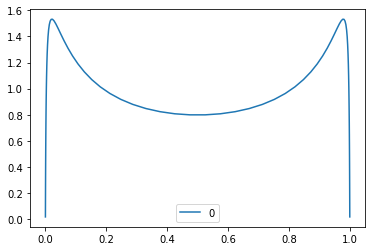

In [66]:
x0,logpx0 = to_unit_interval(z, compute_logp_normal(z, mu=0, std=2))

plt.plot(x0,np.exp(logpx0),label='0')
plt.legend()

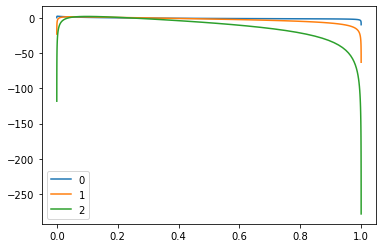

In [58]:
x0,logpx0 = to_unit_interval(z, compute_logp_normal(z, mu=-2, std=2))
x1,logpx1 = to_unit_interval(z, compute_logp_normal(z, mu=-2, std=1))
x2,logpx2 = to_unit_interval(z, compute_logp_normal(z, mu=-2, std=0.5))

plt.plot(x0,logpx0,label='0')
plt.plot(x1,logpx1,label='1')
plt.plot(x2,logpx2,label='2')
plt.legend()

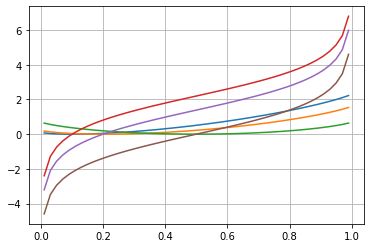

In [68]:
def kl_bernoulli(p,q):
    return q*np.log(q/p) + (1-q)*np.log((1-q)/(1-p))


def der_kl_pq_wrt_q(p,q):
    return np.log(q/p) - np.log((1-q)/(1-p))

q = np.linspace(0.01, 0.99, num=50)
plt.plot(q,kl_bernoulli(0.1,q))
plt.plot(q,kl_bernoulli(0.2,q))
plt.plot(q,kl_bernoulli(0.5,q))
plt.plot(q,der_kl_pq_wrt_q(0.1,q))
plt.plot(q,der_kl_pq_wrt_q(0.2,q))
plt.plot(q,der_kl_pq_wrt_q(0.5,q))
#plt.plot(q,der_kl_pq_wrt_q(0.5,q))
plt.grid()